In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Problem Statement -: Need to predict the status of loan based on other variables</strong>

In [2]:
data = pd.read_csv('loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<strong>
    <ul>
        <li>Loan_ID || Ordinal || can be dropped</li>
        <li>Gender || Categorical </li>
        <li>Married || Categorical</li>
        <li>Dependents || Ordinal</li>
        <li>Education || Categorical</li>
        <li>Self_employed || Categorical</li>
        <li>ApplicantIncome || Continuos</li>
        <li>CoapplicantIncome || Continuos</li>
        <li>LLoanAmount || Continuos</li>
        <li>Loan_Amount_Term || Continuos</li>
        <li>Credit_History || Categorical</li>
        <li>Property_Area || Categorical</li>
        <li>Loan_Status || Categorical || Outcome Variable</li>
    </ul>
</strong>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<strong>We can sse heere that there are 614 different values for load_id, we can drop this column</strong>

In [7]:
data = data.drop(columns=['Loan_ID'])

<h3>Exploarotry Data Analysis</h3>

<h4>StripPlots</h4>

In [8]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

cat_cols = [col for col in data.columns if col not in num_cols]

In [9]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [10]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

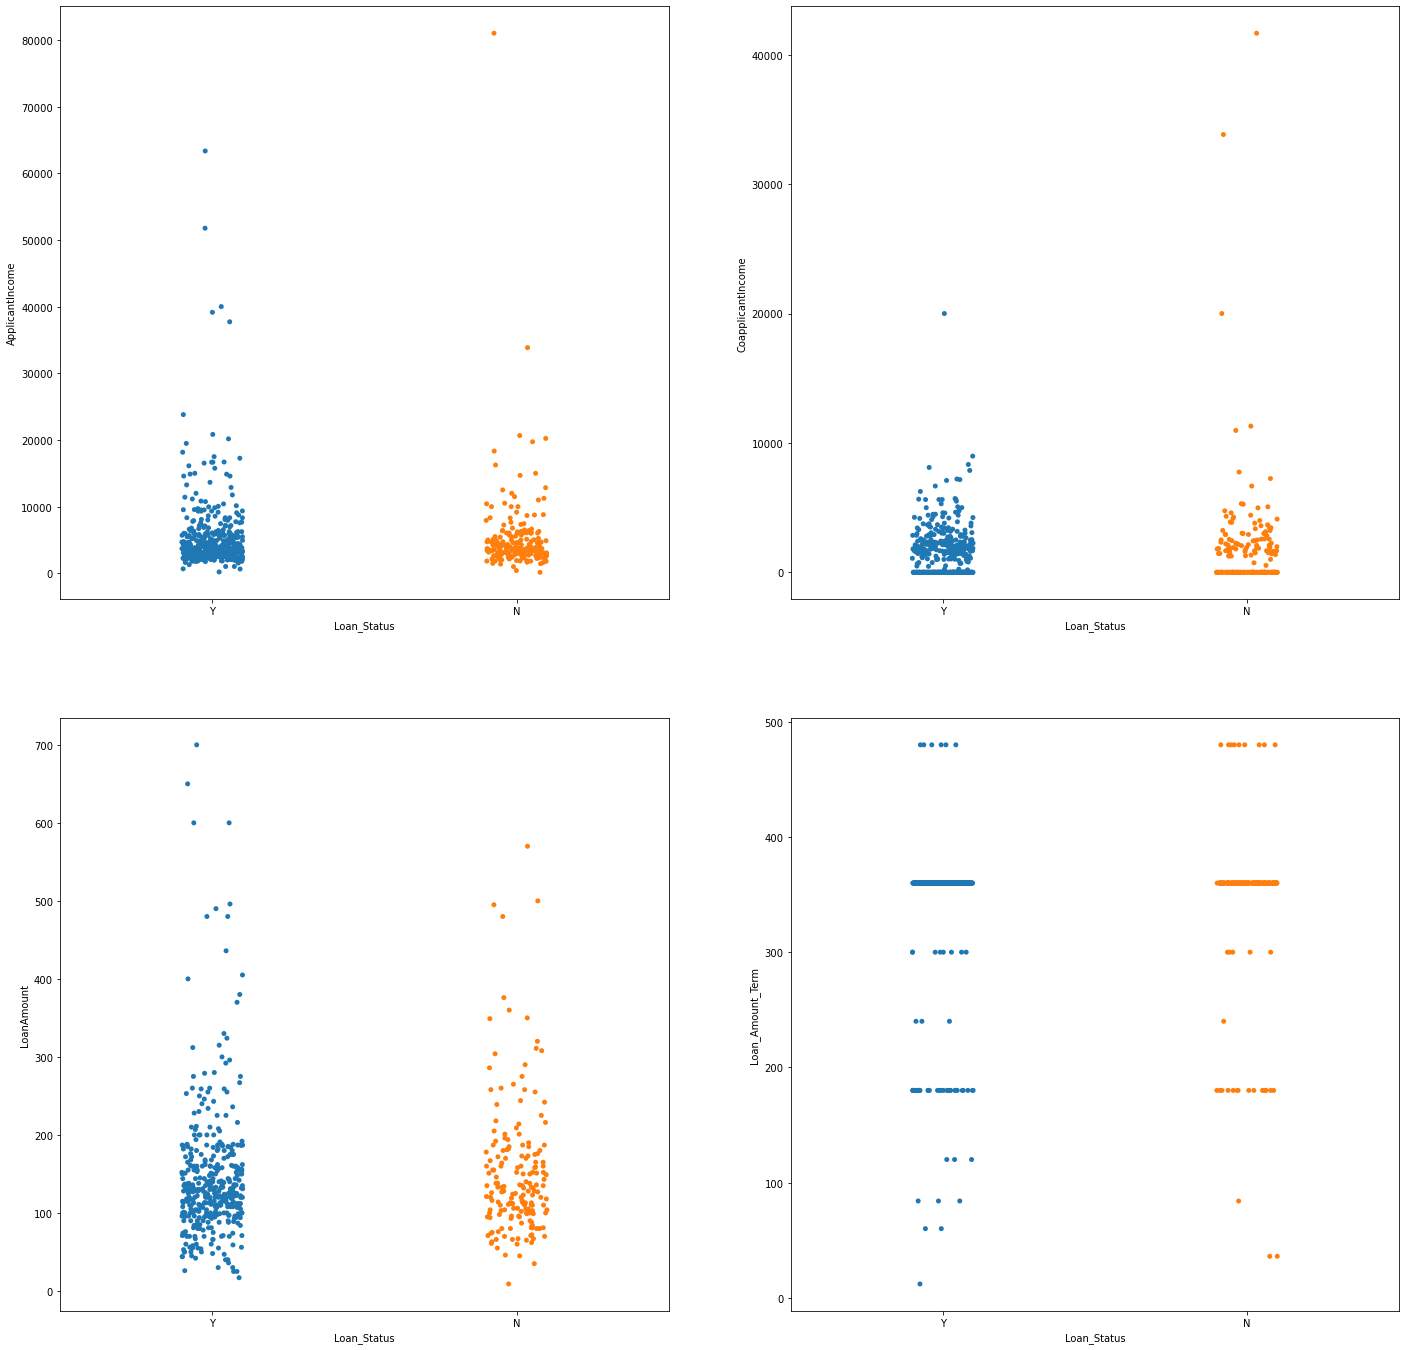

In [11]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    plt.subplot(2,2,plotnumber)
    sns.stripplot(x='Loan_Status', y=col, data=data)
    plotnumber+=1

<strong>If Laon Amount Term is low than chances of appproval are high</strong>

<h3>KDEPlot</h3>

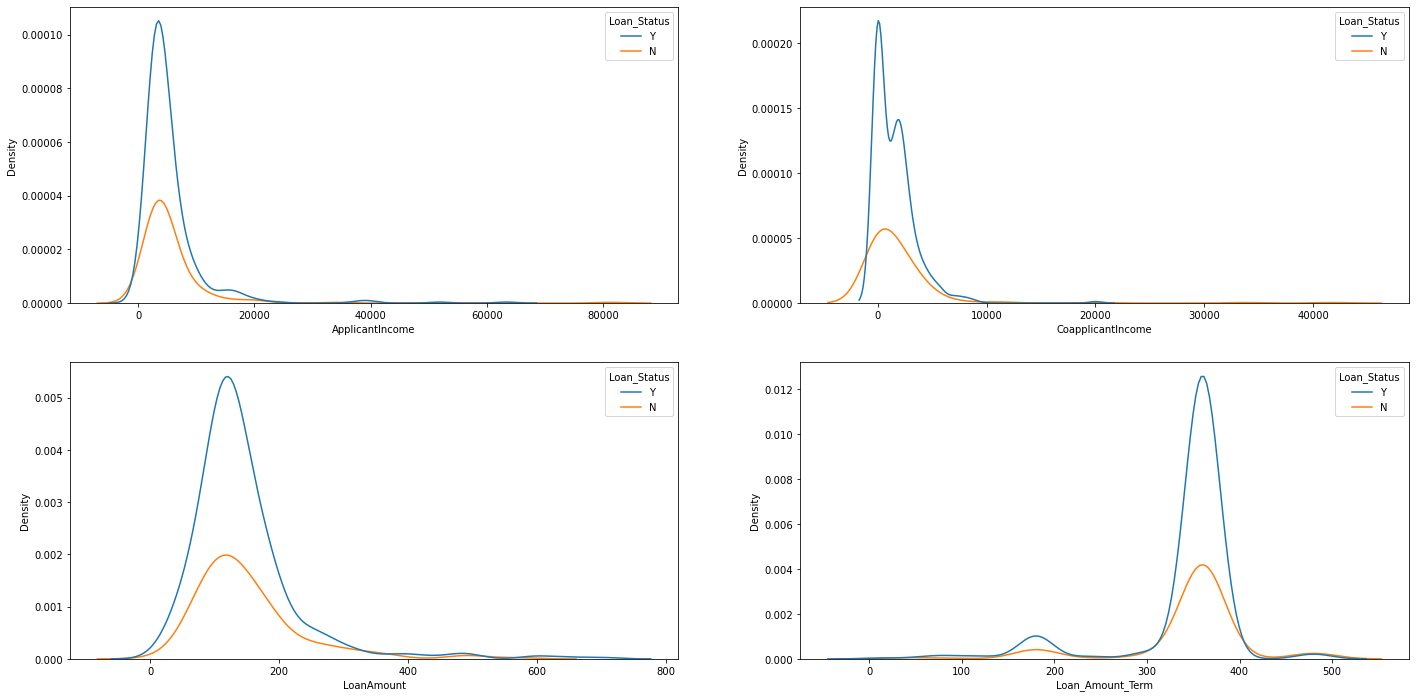

In [12]:
plt.figure(figsize=(24,12))
plotnumber = 1
for col in num_cols:
    plt.subplot(2,2,plotnumber)
    sns.kdeplot(col,hue='Loan_Status', data=data)
    plotnumber+=1

<strong>There are two peaks in CoAppliant Income, means that is if cocapplicant income is greater than chances of approval are high</strong>

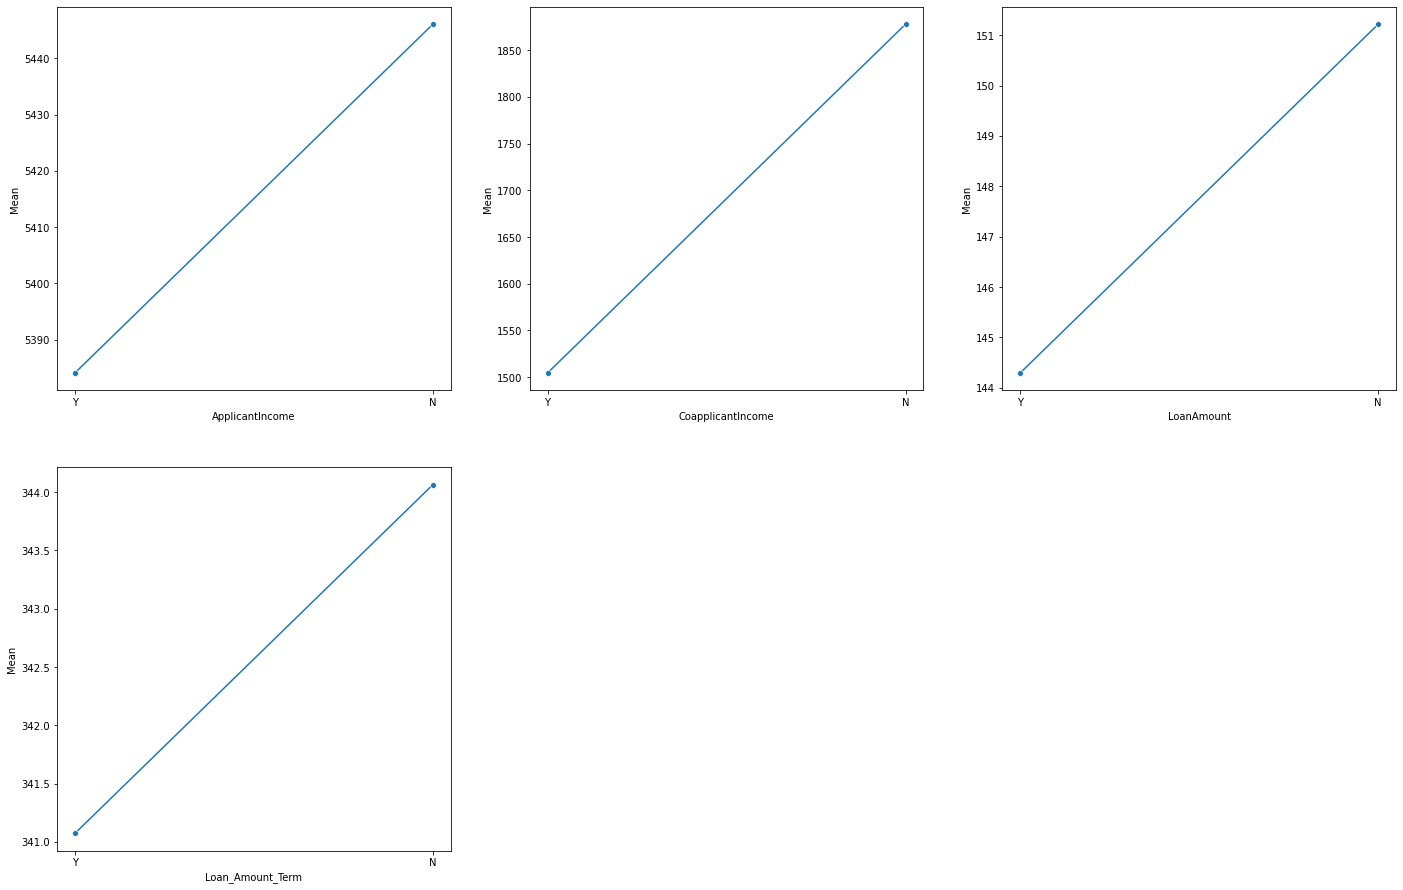

In [13]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    mean_vals = pd.DataFrame()
    unique_val = data['Loan_Status'].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data['Loan_Status'] == val]
        mean_val = mean_val[col].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(3,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

In [14]:
data[data['CoapplicantIncome']==0].CoapplicantIncome.value_counts()

0.0    273
Name: CoapplicantIncome, dtype: int64

In [15]:
Loan_Y = data[data['Loan_Status'] == 'Y']
Loan_N = data[data['Loan_Status'] =='N']

In [16]:
Loan_Y.shape

(422, 12)

In [17]:
Loan_N.shape

(192, 12)

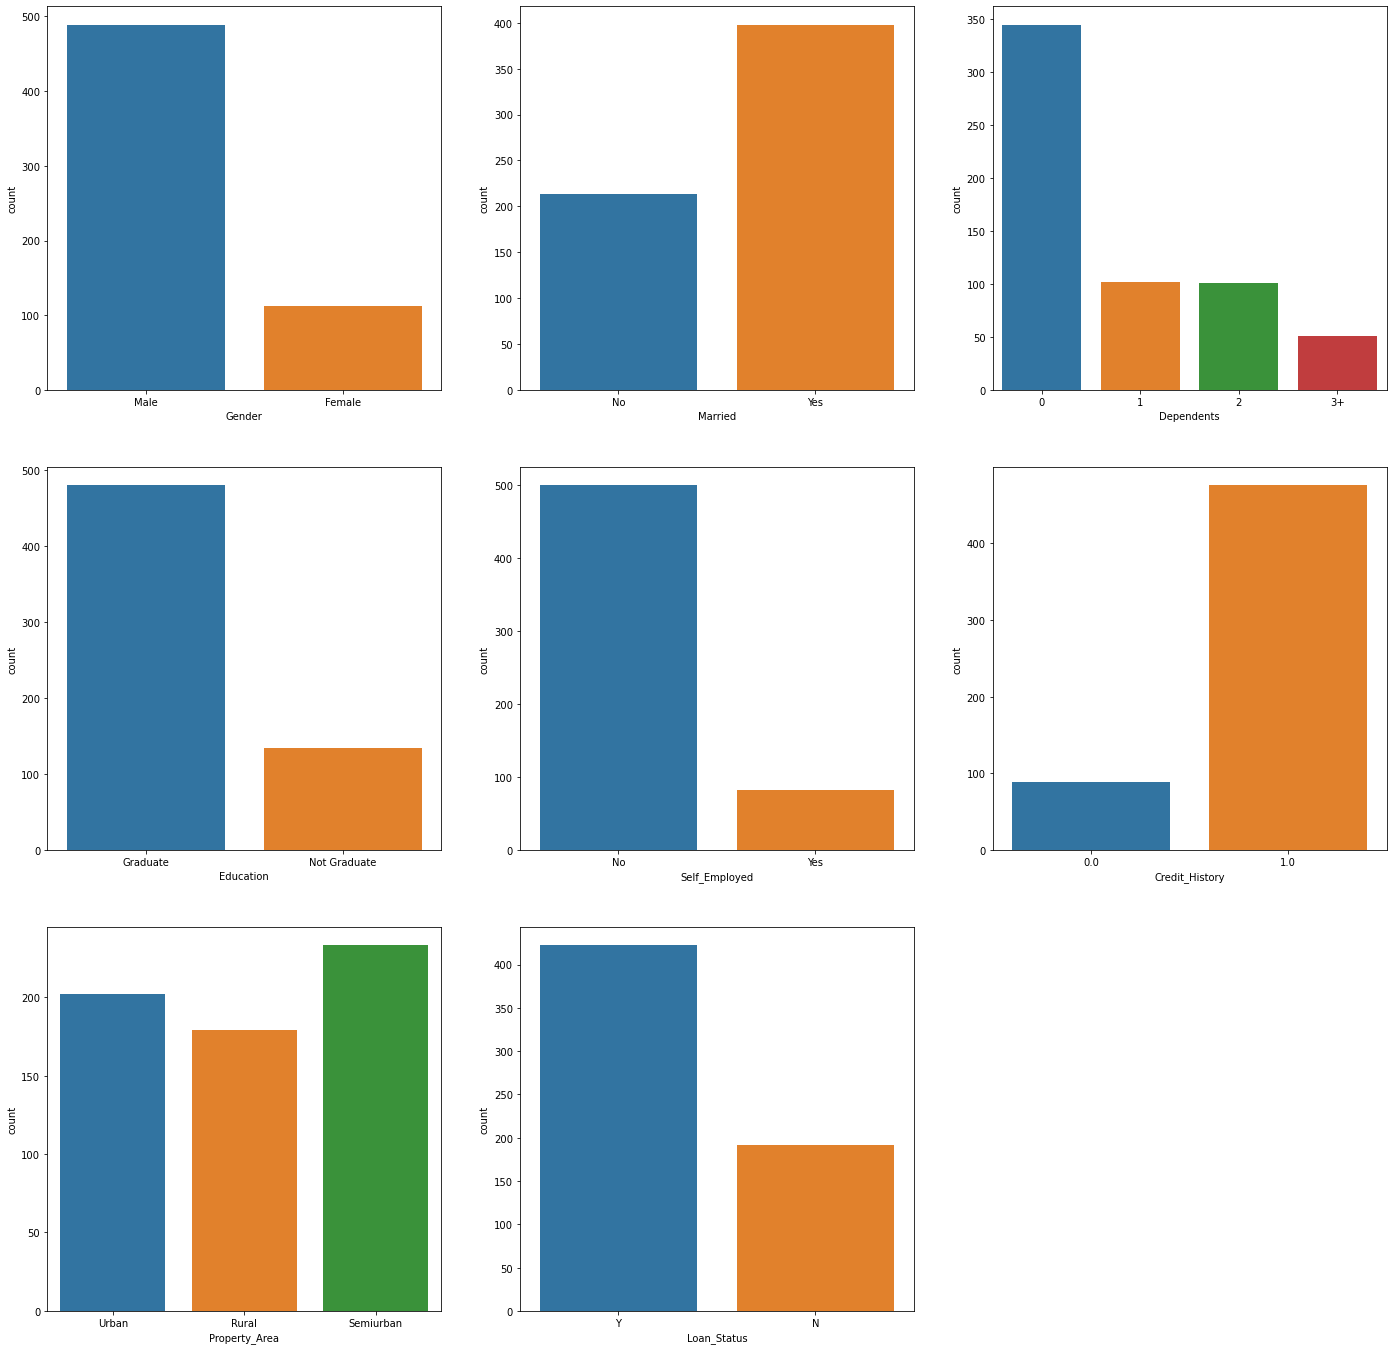

In [18]:
plt.figure(figsize=(24,24))

plotnumber = 1
for col in cat_cols:
    plt.subplot(3,3,plotnumber)
    sns.countplot(data[col])
    plotnumber+=1

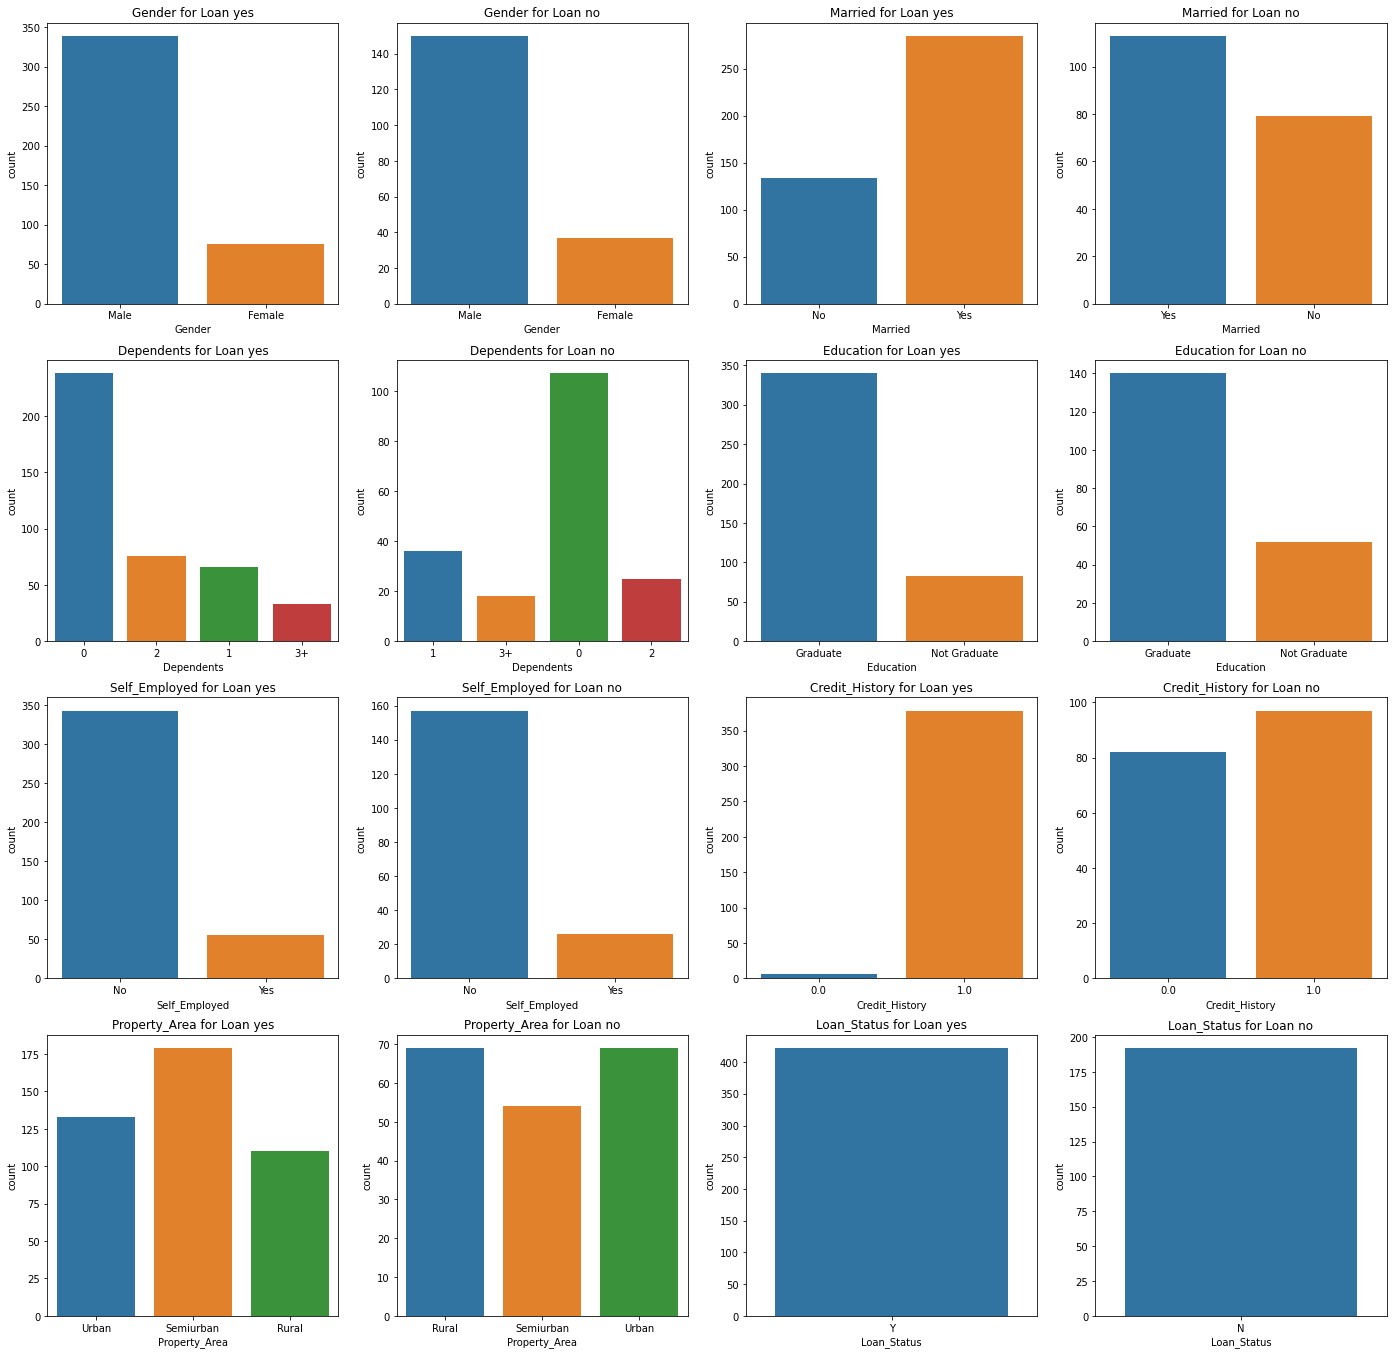

In [19]:
plt.figure(figsize=(24,30))

plotnumber = 1
for col in cat_cols:
    plt.subplot(5,4,plotnumber)
    sns.countplot(Loan_Y[col])
    plt.title(f'{col} for Loan yes')
    plotnumber+=1
    plt.subplot(5,4,plotnumber)
    sns.countplot(Loan_N[col])
    plt.title(f'{col} for Loan no')
    plotnumber+=1

<strong>We can see that people with a credit histrory of 0 are more likely to get rejected for a loan</strong>

<h3>Correlation Matrix</h3>

In [20]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


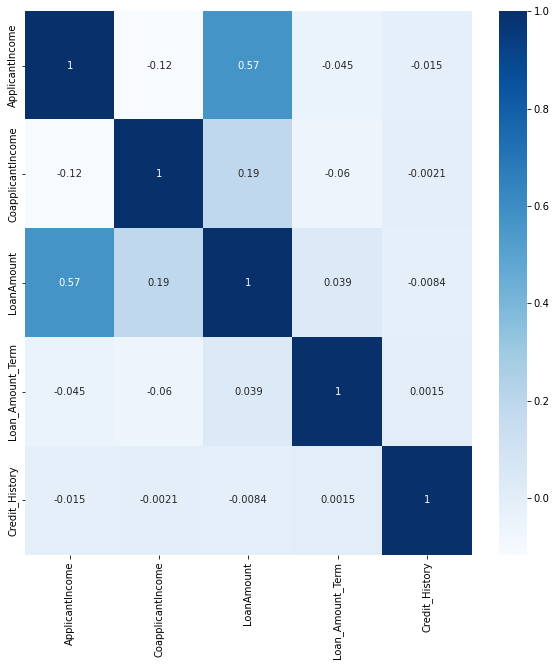

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

<strong>LoanAmount has 57% corelation with ApplicantIncome , other than that there is no significant correlation among variables</strong>

<h3>Descriptive Statistics</h3>

In [22]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<ul>
    <li>ApplicantIncome
        <ul>
            <li>Mean -: 5403.459283</li>
            <li>STD -: 6109.041673</li>
            <li>Min -: 150.000000</li>
            <li>Max -: 81000.000000</li>
        </ul>
    </li>
    <li>CoapplicantIncome
        <ul>
            <li>Mean -: 1621.245798</li>
            <li>STD -: 2926.248369</li>
            <li>Min -: 0.000000</li>
            <li>Max -: 41667.000000</li>
        </ul>
    </li>
    <li>LoanAmount
        <ul>
            <li>Mean -: 146.412162</li>
            <li>STD -: 85.587325</li>
            <li>Min -: 9.000000</li>
            <li>Max -: 700.000000</li>
        </ul>
    </li>
    <li>Loan_Amount_Term
        <ul>
            <li>Mean -: 342.00000</li>
            <li>STD -: 65.12041</li>
            <li>Min -: 12.00000</li>
            <li>Max -: 480.00000</li>
        </ul>
    </li>
    <li>Credit_History
        <ul>
            <li>Min -: 0</li>
            <li>Max -: 1</li>
        </ul>
    </li>
</ul>

<h3>Pairplot</h3>

<Figure size 720x720 with 0 Axes>

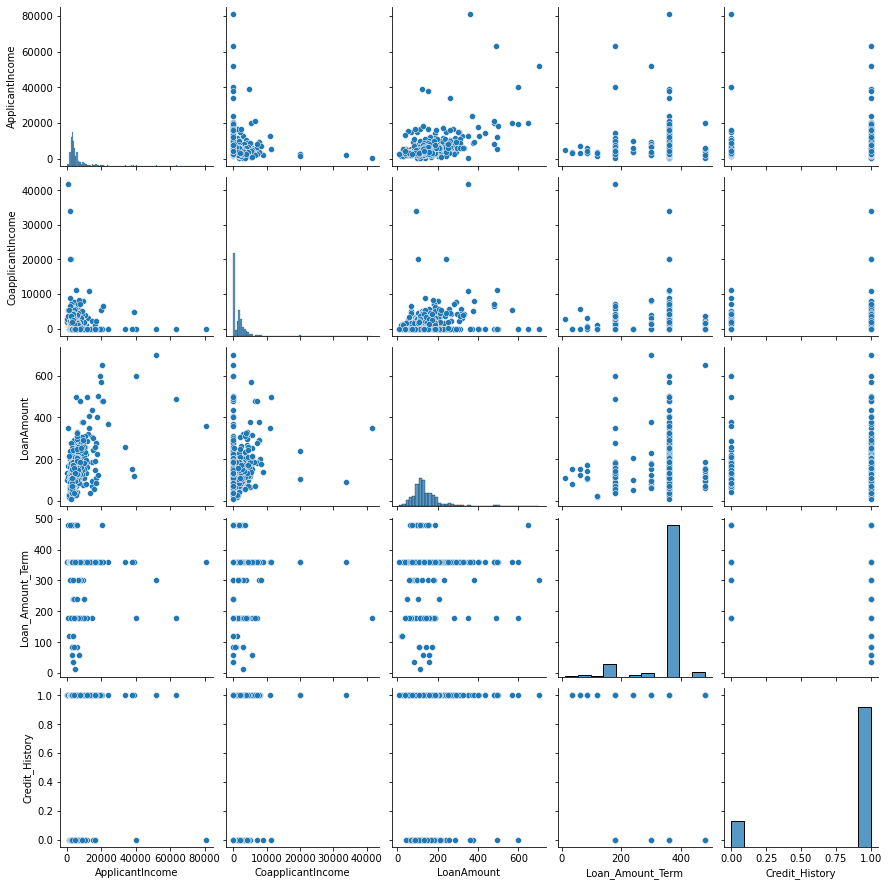

In [23]:
plt.figure(figsize=(10,10))
sns.pairplot(data)

<h3>Handling Outliers</h3>

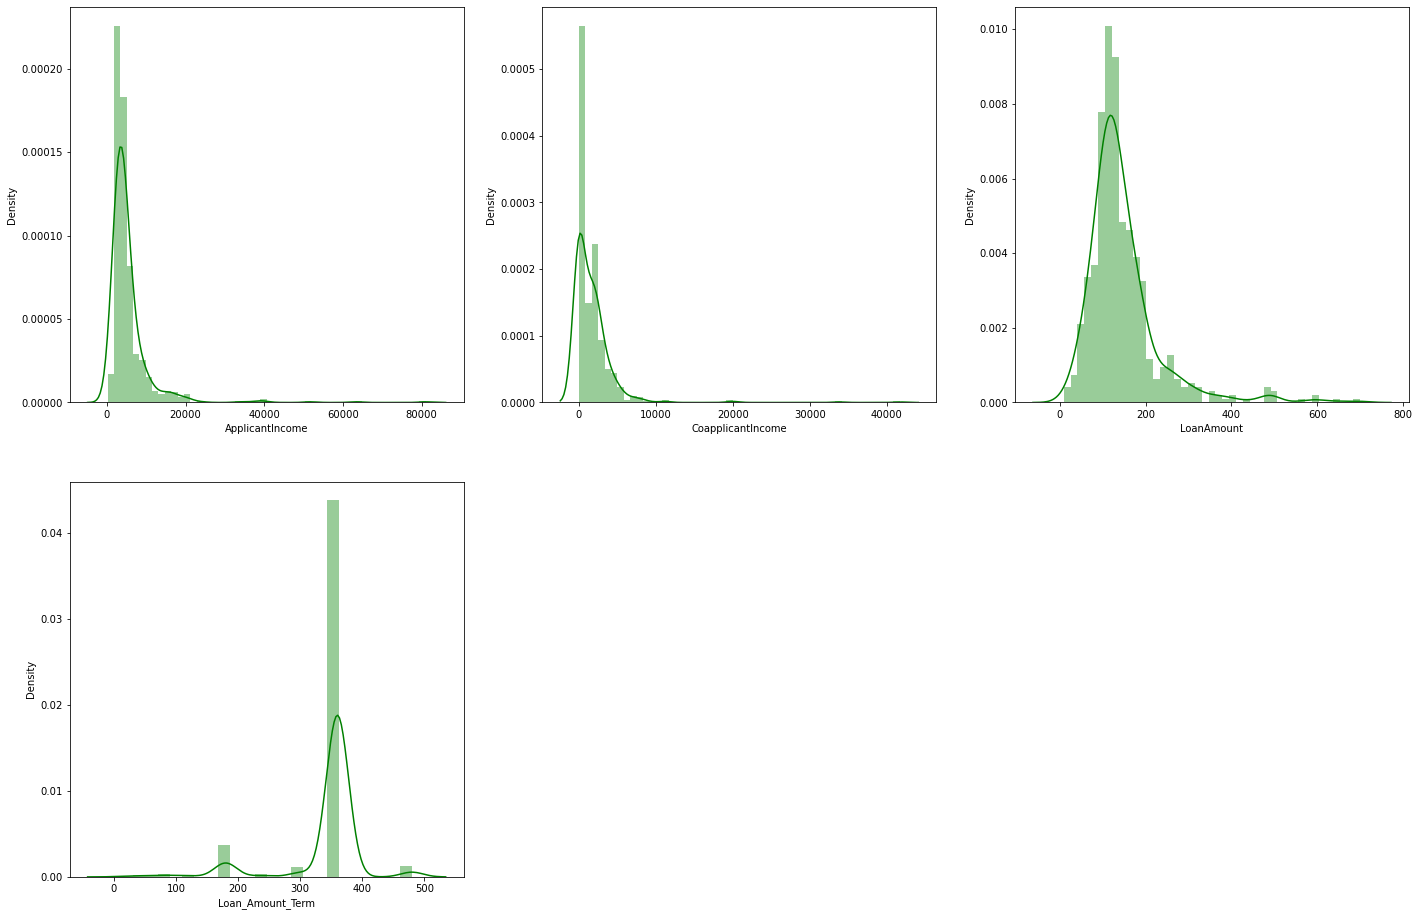

In [24]:
plt.figure(figsize=(24,16))
plotnumber = 1
for col in num_cols:
    plt.subplot(2,3,plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

In [25]:
data[num_cols].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
dtype: float64

In [26]:
data = data.dropna(subset=num_cols)

In [27]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [28]:
data.shape

(578, 12)

In [29]:
X = data[num_cols]

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(578, 4)
Old Shape (578, 12)
New Shape (544, 12)
Total Dropped Rows 34


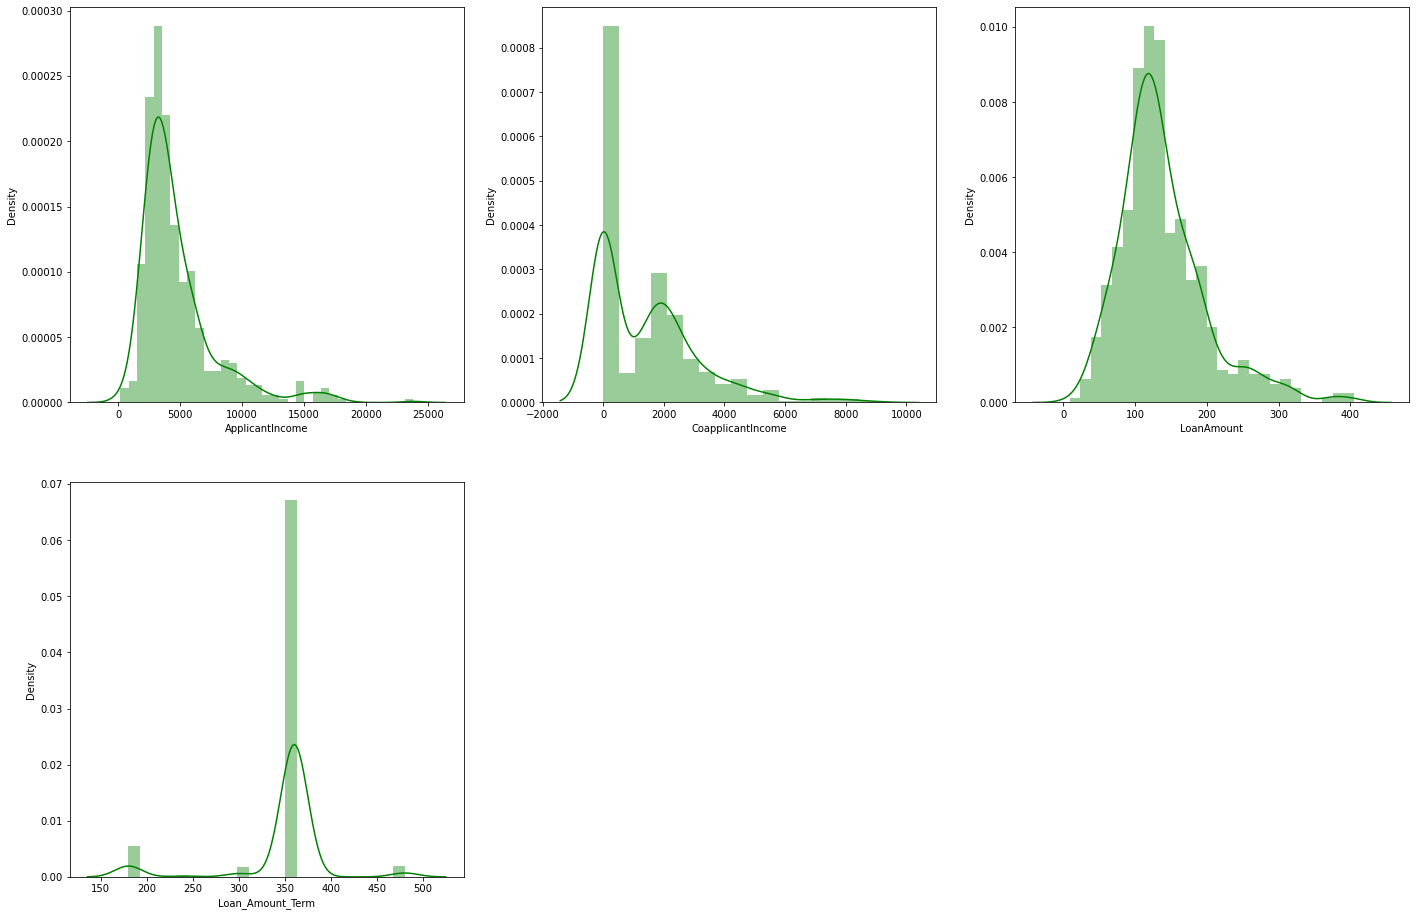

In [31]:
plt.figure(figsize=(24,16))
plotnumber = 1
for col in num_cols:
    plt.subplot(2,3,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [32]:
data_new[num_cols].skew()

ApplicantIncome      2.259353
CoapplicantIncome    1.383481
LoanAmount           1.294999
Loan_Amount_Term    -2.059628
dtype: float64

<strong>We have brought the skewness fairly low, we can bring it down further using power transform</strong>

In [33]:
from sklearn.preprocessing import power_transform
X = data_new[num_cols]
for col in num_cols:
    data_new[col] = power_transform(np.array(data_new[col]).reshape(-1,1), method='yeo-johnson').reshape(544,)

In [34]:
data_new.isnull().sum()

Gender               12
Married               2
Dependents           12
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

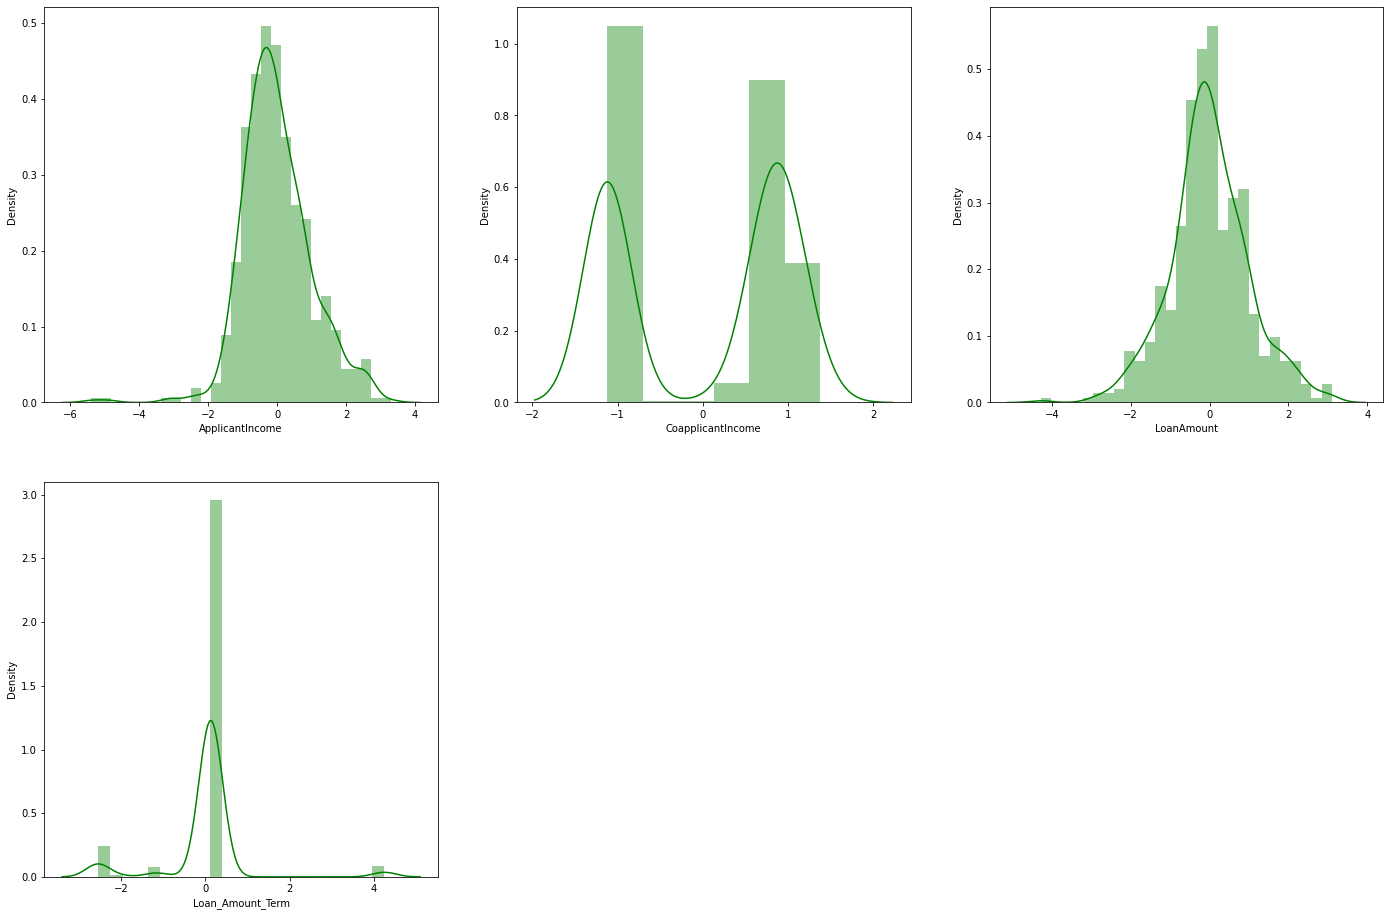

In [35]:
plt.figure(figsize=(24,16))
plotnumber = 1
for col in num_cols:
    plt.subplot(2,3,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [36]:
data_new[num_cols].skew()

ApplicantIncome      0.026926
CoapplicantIncome   -0.187912
LoanAmount           0.043286
Loan_Amount_Term     0.704656
dtype: float64

<strong>Skewness is now remvoed from the data</strong>

<h3>Scaling the dataset</h3>

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

for col in num_cols:
    data_new[col] = sc.fit_transform(np.array(data_new[col]).reshape(-1,1)).reshape(544,)

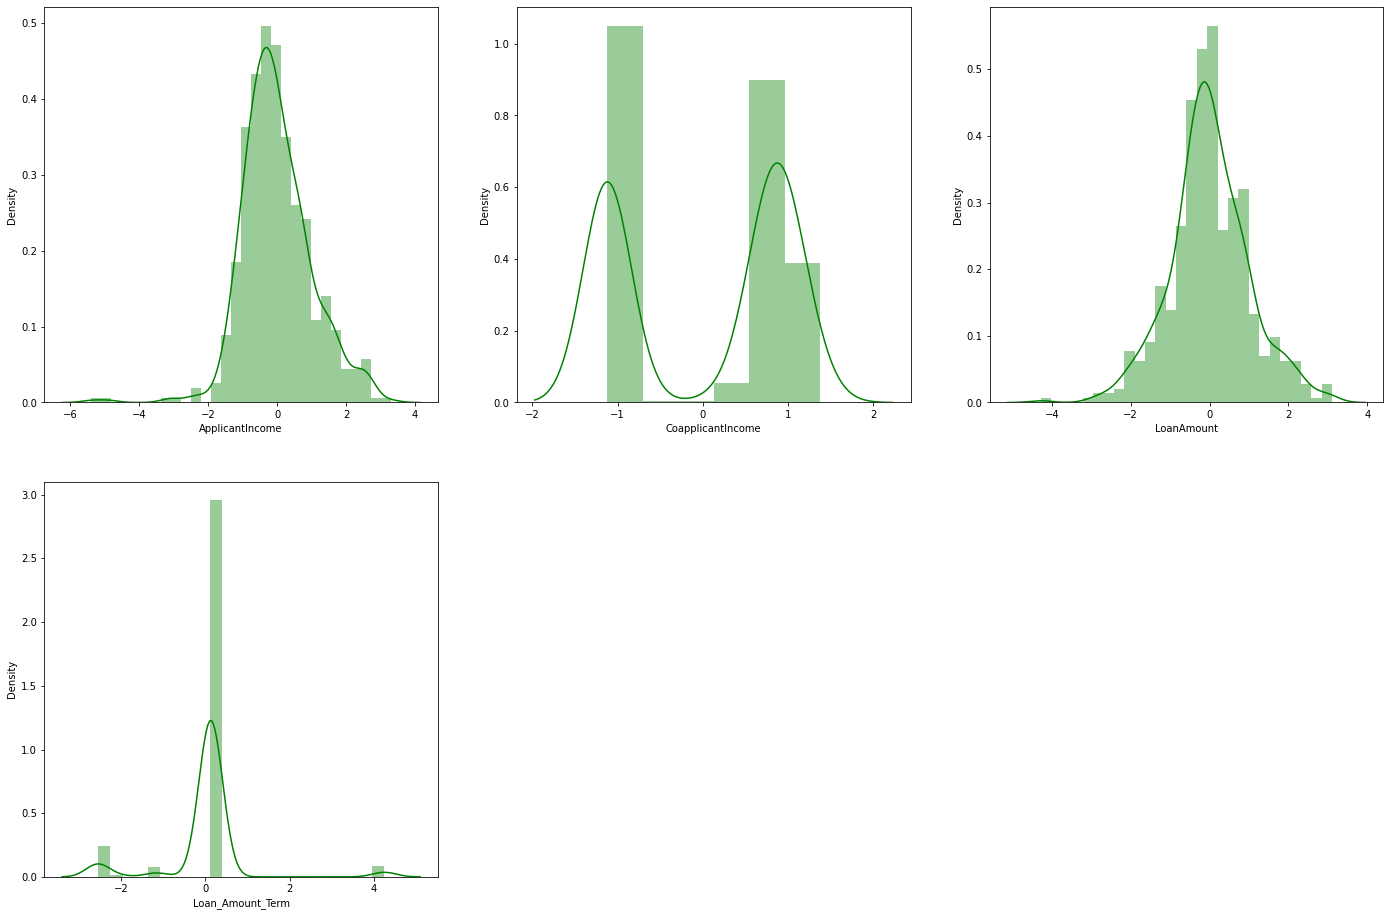

In [38]:
plt.figure(figsize=(24,16))
plotnumber = 1
for col in num_cols:
    plt.subplot(2,3,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [39]:
data_new[num_cols].mean()

ApplicantIncome      2.704128e-18
CoapplicantIncome    1.583700e-16
LoanAmount           4.796000e-18
Loan_Amount_Term    -7.663396e-17
dtype: float64

<h3>Encoding using get_dummies</h3>

In [52]:
data_new = data_new.astype({'Credit_History':'str'})

X = data_new.drop(columns=['Loan_Status'])
y = data_new.Loan_Status

In [53]:
X = pd.get_dummies(X, dummy_na=False)

In [54]:
print(X.shape)

(544, 22)


In [55]:
y.shape

(544,)

<h3>Check for MultiCollinearity</h3>

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(5, 'vif')

,vif,Features
0,1.790521,ApplicantIncome
2,1.585828,LoanAmount
1,1.426285,CoapplicantIncome
3,1.020589,Loan_Amount_Term


In [57]:
X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Credit_History_0.0         0
Credit_History_1.0         0
Credit_History_nan         0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

<strong>no multicollinearity problem</storng>

<h3>OverSampling</h3>

In [58]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<h3>Building and Trainig Models</h3>

In [59]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, classification_report, confusion_matrix

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)

(534, 22)
(230, 22)


<h3>Logistic Regression</h3>

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8408239700374532
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.75      0.91      0.83       222
           Y       0.93      0.79      0.85       312

    accuracy                           0.84       534
   macro avg       0.84      0.85      0.84       534
weighted avg       0.86      0.84      0.84       534


Testing Accuracy : 0.8565217391304348
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.80      0.90      0.85       100
           Y       0.91      0.82      0.87       130

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



Text(33.0, 0.5, 'Predicted')

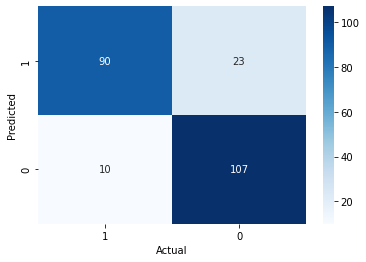

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

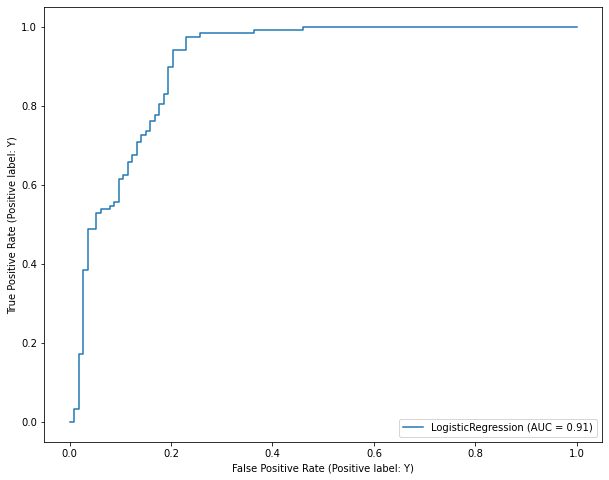

In [63]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [65]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(10, 500, 50),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Score: 0.8033707865168539
Best Params: {'dual': False, 'fit_intercept': True, 'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [66]:
lrcv = LogisticRegression(max_iter=10, solver='newton-cg')

lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8408239700374532
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.75      0.91      0.83       222
           Y       0.93      0.79      0.85       312

    accuracy                           0.84       534
   macro avg       0.84      0.85      0.84       534
weighted avg       0.86      0.84      0.84       534


Testing Accuracy : 0.8565217391304348
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.80      0.90      0.85       100
           Y       0.91      0.82      0.87       130

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



Text(33.0, 0.5, 'Predicted')

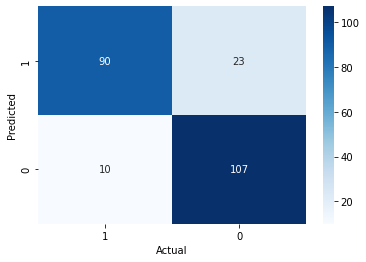

In [67]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

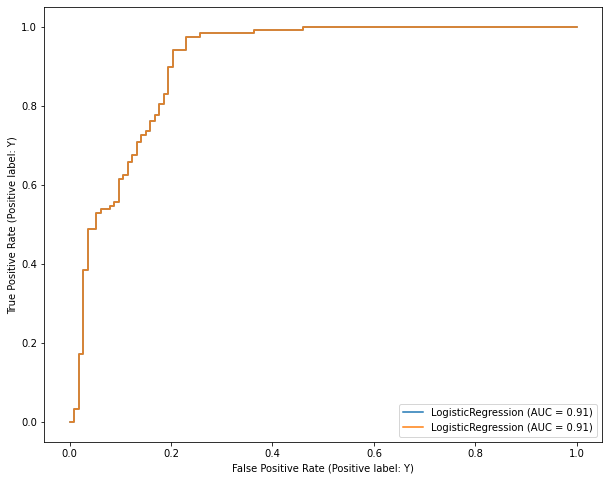

In [68]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)

<h3>KNeighors Classifier</h3>

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))


Training Accuracy :  0.8558052434456929
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.86      0.86      0.86       268
           Y       0.86      0.85      0.85       266

    accuracy                           0.86       534
   macro avg       0.86      0.86      0.86       534
weighted avg       0.86      0.86      0.86       534


Testing Accuracy : 0.8173913043478261
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.79      0.83      0.81       107
           Y       0.85      0.80      0.83       123

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.82      0.82      0.82       230



Text(33.0, 0.5, 'Predicted')

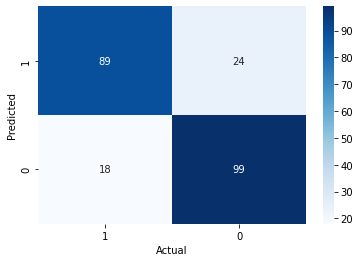

In [70]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

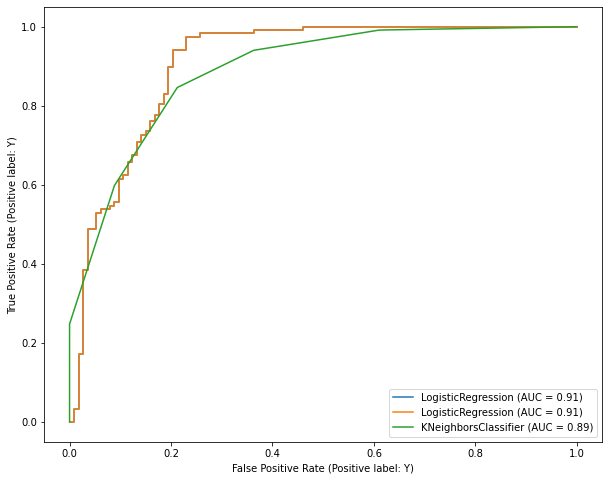

In [71]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)

<h4>hyperParameter Tuning</h4>

In [73]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13],
    'leaf_size':[5,10,15,25,30,35,40,50]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Score: 0.7640449438202248
Best Params: {'leaf_size': 5, 'n_neighbors': 3}


In [74]:
knncv = KNeighborsClassifier(n_neighbors=3, leaf_size=5)
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8951310861423221
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.91      0.89      0.90       275
           Y       0.88      0.90      0.89       259

    accuracy                           0.90       534
   macro avg       0.90      0.90      0.90       534
weighted avg       0.90      0.90      0.90       534


Testing Accuracy : 0.8347826086956521
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.82      0.84      0.83       111
           Y       0.85      0.83      0.84       119

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230



Text(33.0, 0.5, 'Predicted')

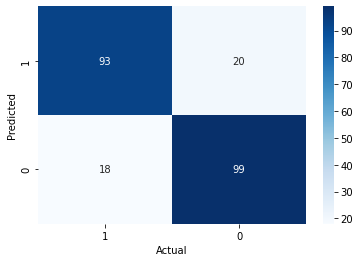

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

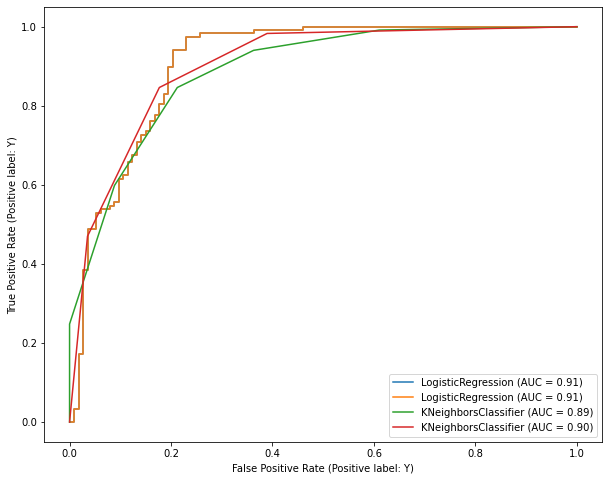

In [76]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)

<h3>DecisionTree Classifier</h3>

In [77]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       269
           Y       1.00      1.00      1.00       265

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534


Testing Accuracy : 0.8
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.80      0.80      0.80       113
           Y       0.80      0.80      0.80       117

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



Text(33.0, 0.5, 'Predicted')

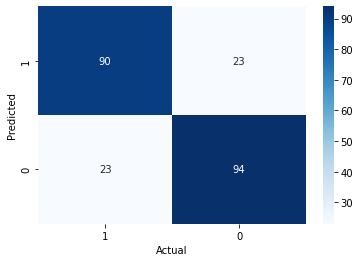

In [78]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

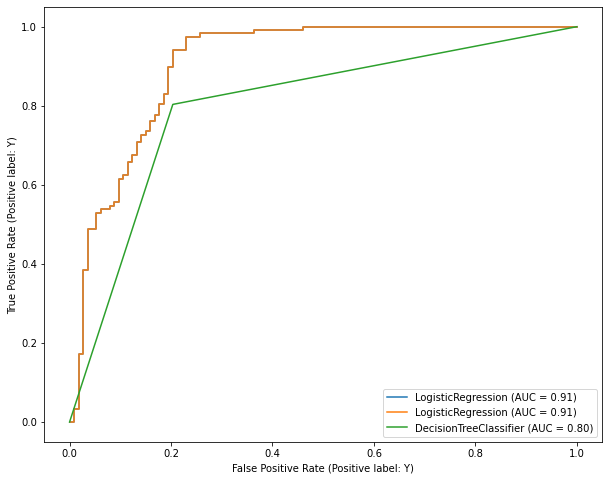

In [79]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)

<h4>HyperParameter Tuning</h4>

In [84]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None,15,16,17,18,19,20],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5,6,7],
    'max_leaf_nodes':[20,25,30,35,40,50,None]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Best Score: 0.8183520599250936
Best Params: {'criterion': 'entropy', 'max_depth': 17, 'max_leaf_nodes': 30, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [94]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=16, max_leaf_nodes=25, min_samples_leaf=3, min_samples_split=2, splitter='random')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8539325842696629
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.79      0.91      0.84       233
           Y       0.92      0.81      0.86       301

    accuracy                           0.85       534
   macro avg       0.85      0.86      0.85       534
weighted avg       0.86      0.85      0.85       534


Testing Accuracy : 0.8217391304347826
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.77      0.85      0.81       102
           Y       0.87      0.80      0.83       128

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.83      0.82      0.82       230



Text(33.0, 0.5, 'Predicted')

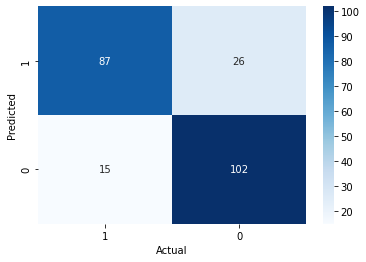

In [95]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

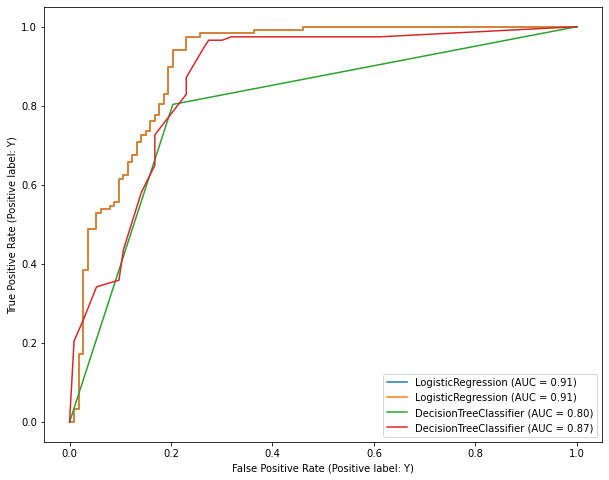

In [96]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)

<h3>RandomForest Classifier</h3>

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       269
           Y       1.00      1.00      1.00       265

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534


Testing Accuracy : 0.8391304347826087
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.82      0.85      0.83       110
           Y       0.85      0.83      0.84       120

    accuracy                           0.84       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.84      0.84      0.84       230



Text(33.0, 0.5, 'Predicted')

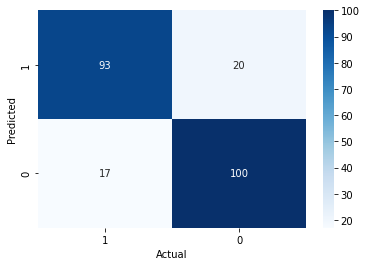

In [98]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

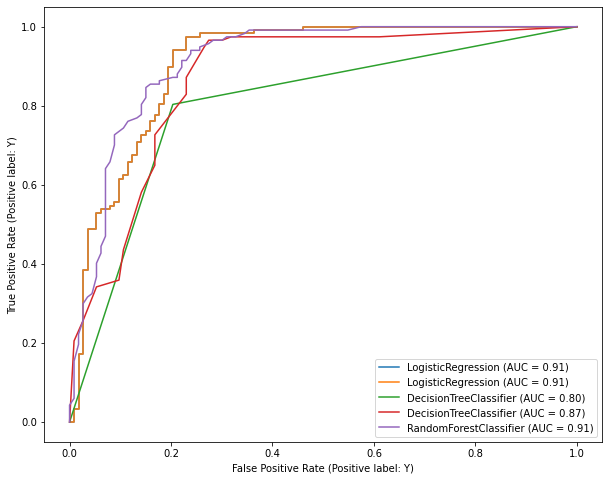

In [99]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

In [101]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[180,200,250,300,350],
    'max_depth':[None,16,17,18],
    'min_samples_split':[2,3,4,],
    'min_samples_leaf':[2,3,4,],
    'max_leaf_nodes':[None,35,40,45,50,55],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best Score: 0.8146067415730337
Best Params: {'max_depth': 17, 'max_leaf_nodes': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': -1}


In [102]:
rfcv = RandomForestClassifier( max_depth=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300, max_leaf_nodes=40)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9250936329588015
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.88      0.97      0.92       243
           Y       0.97      0.89      0.93       291

    accuracy                           0.93       534
   macro avg       0.93      0.93      0.92       534
weighted avg       0.93      0.93      0.93       534


Testing Accuracy : 0.8391304347826087
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.76      0.90      0.82        96
           Y       0.91      0.80      0.85       134

    accuracy                           0.84       230
   macro avg       0.84      0.85      0.84       230
weighted avg       0.85      0.84      0.84       230



Text(33.0, 0.5, 'Predicted')

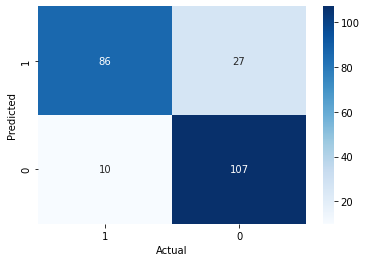

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

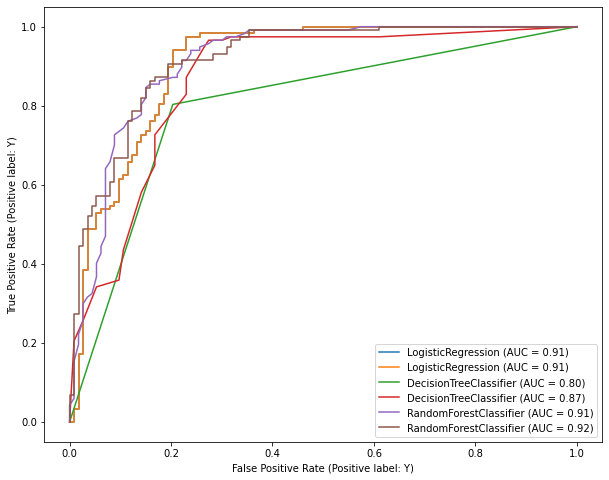

In [105]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)

<strong>This model has the best AUC Score</strong>

<h3>AdaBoost Classifier</h3>

In [106]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8558052434456929
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.80      0.90      0.85       238
           Y       0.91      0.82      0.86       296

    accuracy                           0.86       534
   macro avg       0.86      0.86      0.86       534
weighted avg       0.86      0.86      0.86       534


Testing Accuracy : 0.8173913043478261
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.76      0.85      0.80       101
           Y       0.87      0.79      0.83       129

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.82      0.82      0.82       230



Text(33.0, 0.5, 'Predicted')

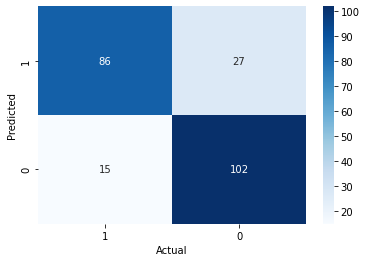

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [108]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[30,50,70,90,110,130,150],
    'learning_rate':[0.01, 0.05, 0.1,0.3,0.5,0.7, 0.9,1,1.4,1.5]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=1)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best Score: 0.7808988764044944
Best Params: {'learning_rate': 0.9, 'n_estimators': 130}


In [109]:
adcv = AdaBoostClassifier(n_estimators=130, learning_rate=0.9)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8782771535580525
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.83      0.92      0.87       244
           Y       0.92      0.84      0.88       290

    accuracy                           0.88       534
   macro avg       0.88      0.88      0.88       534
weighted avg       0.88      0.88      0.88       534


Testing Accuracy : 0.8260869565217391
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

           N       0.78      0.85      0.81       103
           Y       0.87      0.80      0.84       127

    accuracy                           0.83       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.83      0.83      0.83       230



Text(33.0, 0.5, 'Predicted')

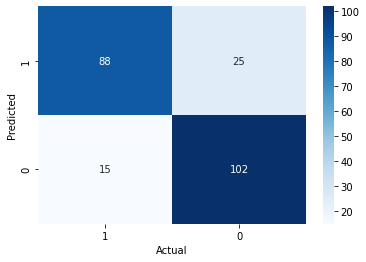

In [110]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

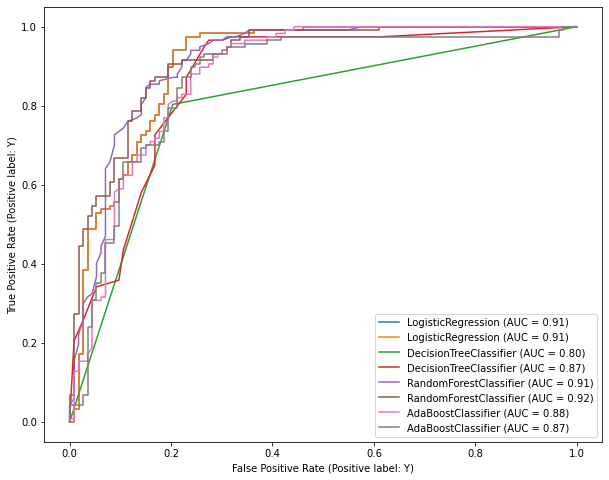

In [111]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)
plot_roc_curve(adcv, X_test, y_test, ax=ax)

<strong>Random Forest is best performing model</strong>

<h3>model Saving</h3>

In [112]:
import pickle
pickle.dump(rfcv, open('final.pickle', 'wb'))